In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Activation, Conv2D ,Dropout,Dense,Conv2D,AveragePooling2D,Flatten,ZeroPadding2D,MaxPooling2D
from keras import optimizers
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical

In [247]:
import imageio
import cv2
from os import listdir
def loadImages(path):
    imageList = []
    for file in listdir(path):
        file_path = path + file
        if file.endswith('.jpg'):
                image = imageio.imread(file_path)
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
                imageList.append(image)
    return imageList

In [248]:
def ShowFirstFive(images_arr,title):

    fig, axes = plt.subplots(1, 5, figsize=(20,20))

    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.set_title(title,fontsize=20)
    plt.tight_layout()
    plt.show()

100
training_labels size 1299
training dataset size is  1299
training ----------------------------------------------------------------- sample


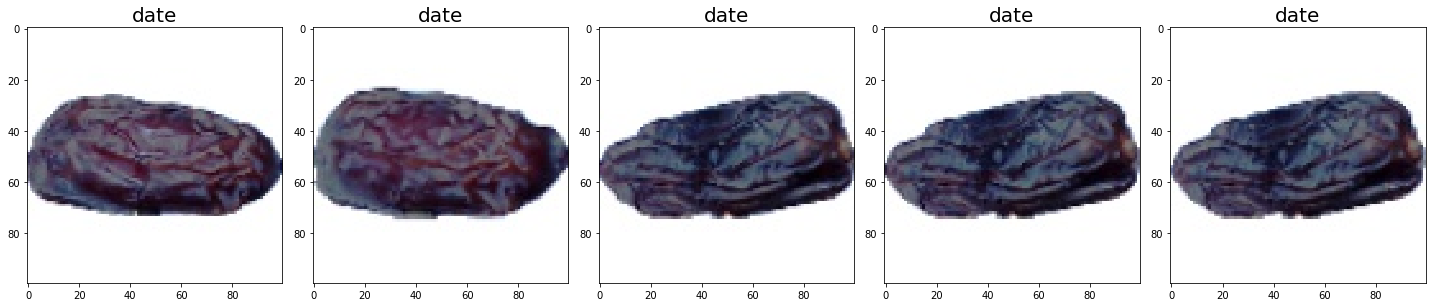

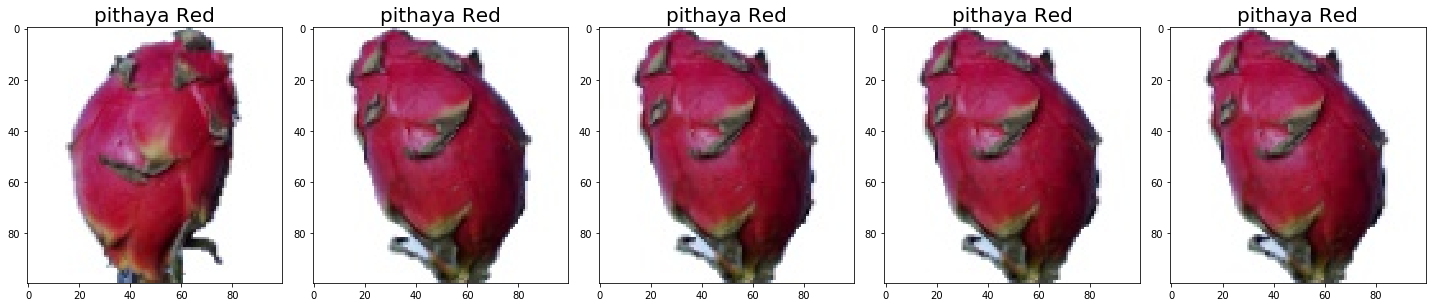

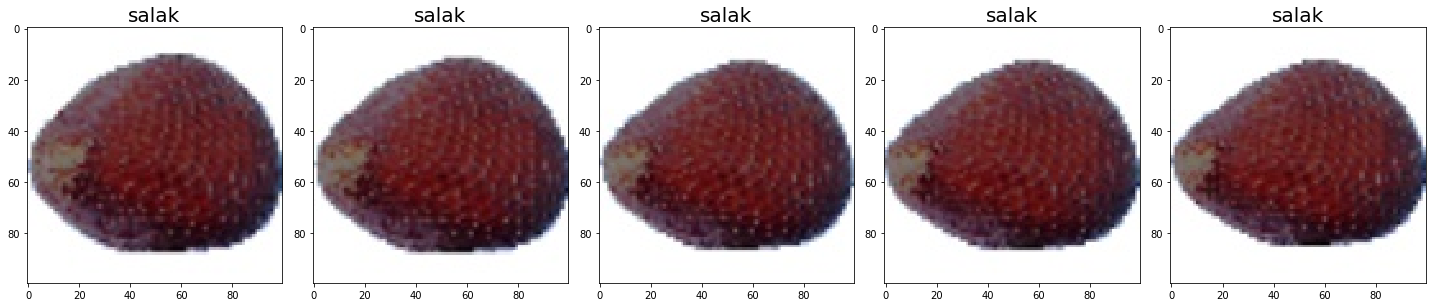

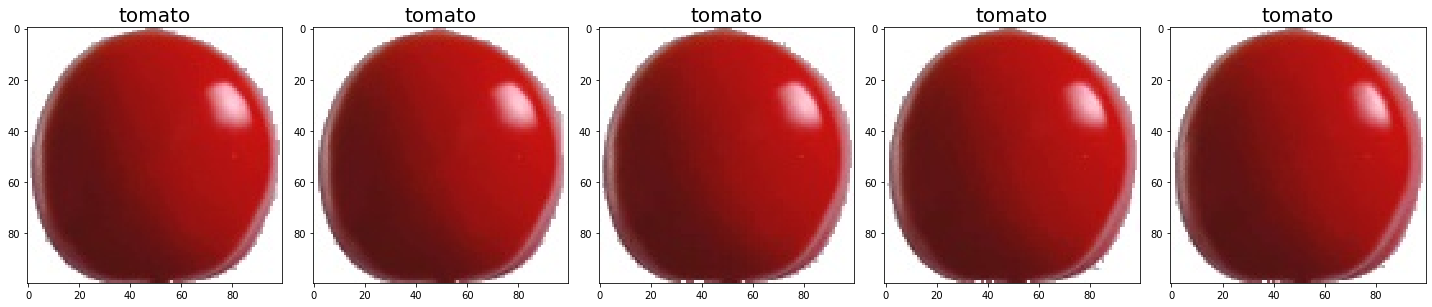

100
testing dataset size is  326
testing ----------------------------------------------------------------- sample


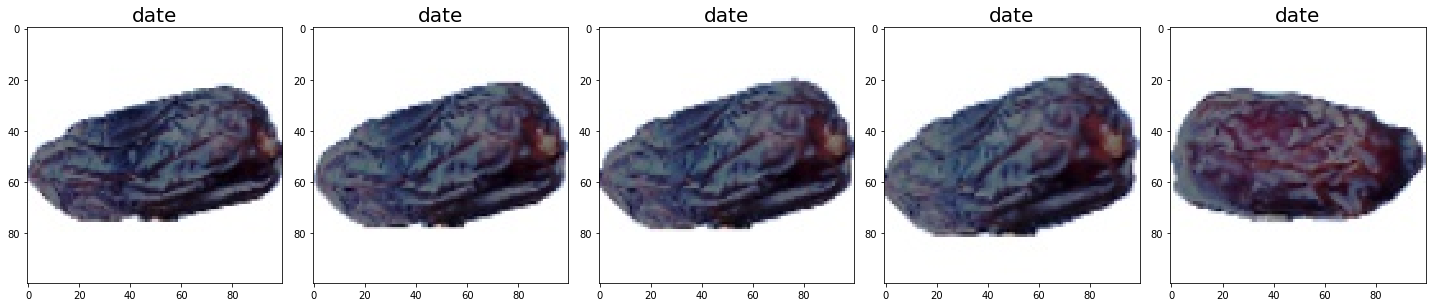

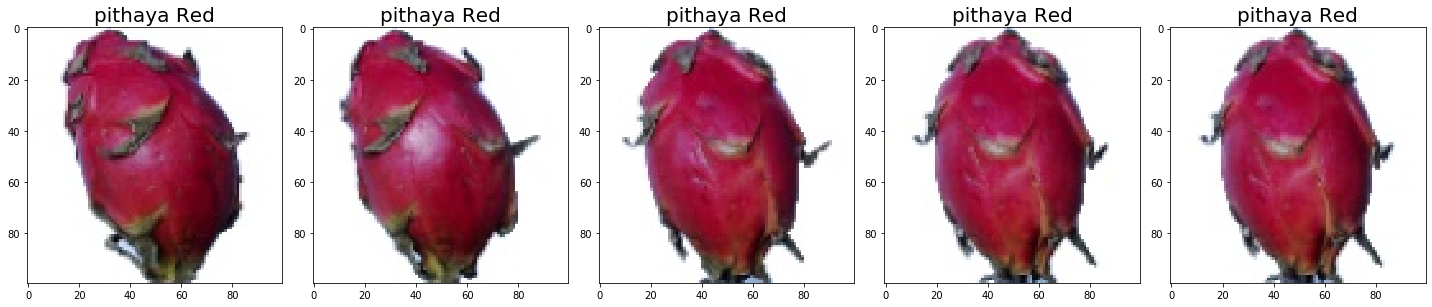

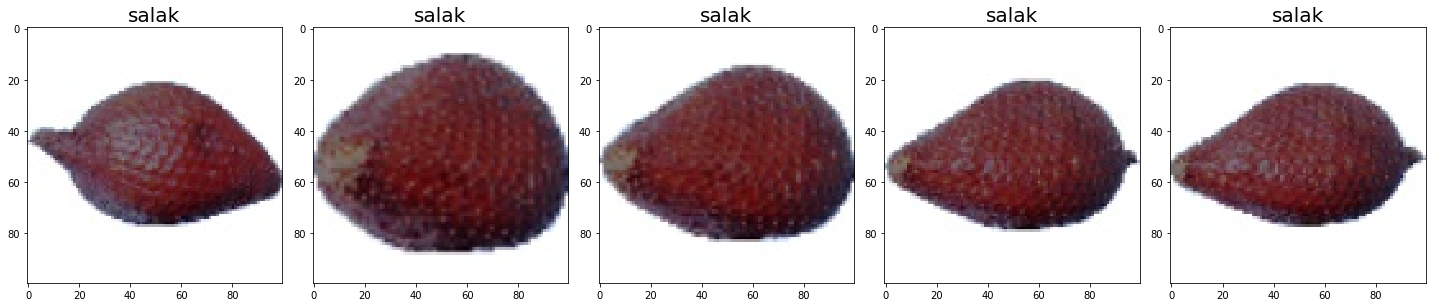

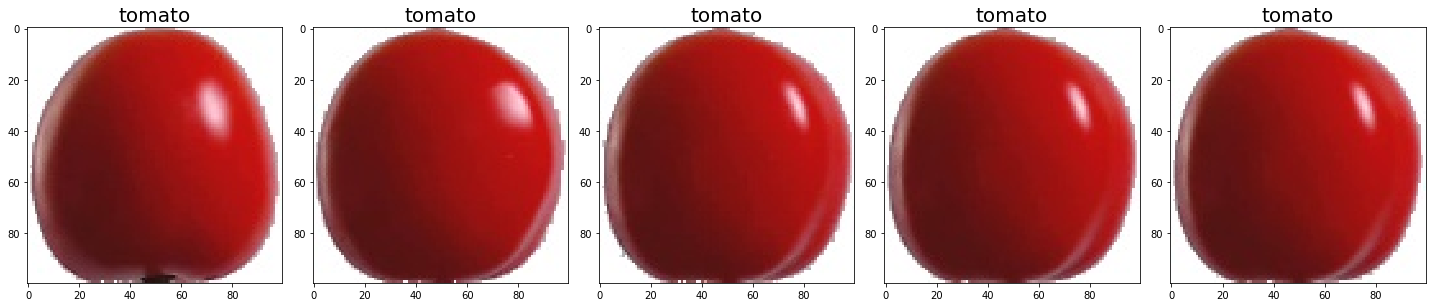

In [249]:
training_data = []
training_labels = []
dateList = []
base_path = "./training_set/"
dates=base_path+'Dates/'
dateList = loadImages(dates)
training_data.extend(dateList[:])
training_labels += len(dateList)* [0]
print(len(training_data[0]))

PitahayaRedList = []
PitahayaRed = base_path+'Pitahaya Red/'
PitahayaRedList = loadImages(PitahayaRed)
training_data.extend(PitahayaRedList[:])
training_labels += len(PitahayaRedList)* [1]

SalakList = []
Salak = base_path+'Salak/'
SalakList = loadImages(Salak)
training_data.extend(SalakList[:])
training_labels += len(SalakList)* [2]

tomatoList = []
tomato = base_path+'tomato/'
tomatoList = loadImages(tomato)
training_data.extend(tomatoList[:])
training_labels += len(tomatoList)* [3]
print("training_labels size", len(training_labels))
print("training dataset size is ", len(training_data))
print("training ----------------------------------------------------------------- sample")
ShowFirstFive(dateList,'date')
ShowFirstFive(PitahayaRedList,'pithaya Red')
ShowFirstFive(SalakList,'salak')
ShowFirstFive(tomatoList, 'tomato')
#---------------------------------------------------
testing_data = []
testing_labels = []
dateList = []
base_path = "./test_set/"
dates=base_path+'Dates/'
dateList = loadImages(dates)
testing_data.extend(dateList[:])
testing_labels += len(dateList)* [0]

PitahayaRedList = []
PitahayaRed = base_path+'Pitahaya Red/'
PitahayaRedList = loadImages(PitahayaRed)
testing_data.extend(PitahayaRedList[:])
testing_labels += len(PitahayaRedList)* [1]

SalakList = []
Salak = base_path+'Salak/'
SalakList = loadImages(Salak)
testing_data.extend(SalakList[:])
testing_labels += len(SalakList)* [2]
print(len(testing_data[0]))

tomatoList = []
tomato = base_path+'tomato/'
tomatoList = loadImages(tomato)
testing_data.extend(tomatoList[:])
testing_labels += len(tomatoList)* [3]

print("testing dataset size is ", len(testing_data))
print("testing ----------------------------------------------------------------- sample")
ShowFirstFive(dateList,'date')
ShowFirstFive(PitahayaRedList,'pithaya Red')
ShowFirstFive(SalakList,'salak')
ShowFirstFive(tomatoList, 'tomato')

In [250]:
NB_CLASSES = 4
VERBOSE = 1
NB_EPOCH = 20
BATCH_SIZE = 10
VALIDATION_SPLIT = 0.2
N_HIDDEN = 128
DROPOUT = 0.3


Y_train = np_utils.to_categorical(training_labels, NB_CLASSES)
Y_test = np_utils.to_categorical(testing_labels, NB_CLASSES)

In [251]:
# RESHAPED = 100*100*3
X_train = np.array(training_data)#.reshape(1299, RESHAPED)
X_test = np.array(testing_data)#.reshape(326, RESHAPED)
# print(X_train.shape)

In [252]:
def reorder(old_list,order):
    new_list = []
    for i in order:
        new_list.append(old_list[i])
    return new_list

np.random.seed(seed=42)
indices = np.arange(len(Y_train))
np.random.shuffle(indices)
indices = indices.tolist()
fruit_labels = reorder(Y_train,indices)
fruit_images = reorder(X_train,indices)
X_train = np.array(fruit_images)
Y_train = np.array(fruit_labels)

In [253]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding= 'same',input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), padding= 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.compile(optimizer = 'adam', loss= 'categorical_crossentropy' , metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose = VERBOSE)
print("test score: ", score[0])
print("Test accuracy", score[1])

Train on 1039 samples, validate on 260 samples
Epoch 1/20
1039/1039 [==============================] - 26s 25ms/step - loss: 20.6513 - accuracy: 0.8672 - val_loss: 0.0688 - val_accuracy: 0.9615
Epoch 2/20
1039/1039 [==============================] - 13s 12ms/step - loss: 0.0113 - accuracy: 0.9942 - val_loss: 0.0171 - val_accuracy: 0.9962
Epoch 3/20
1039/1039 [==============================] - 13s 13ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 6.6992e-04 - val_accuracy: 1.0000
Epoch 4/20
1039/1039 [==============================] - 13s 13ms/step - loss: 3.2733e-04 - accuracy: 1.0000 - val_loss: 3.2327e-04 - val_accuracy: 1.0000
Epoch 5/20
1039/1039 [==============================] - 13s 12ms/step - loss: 1.8442e-04 - accuracy: 1.0000 - val_loss: 2.0724e-04 - val_accuracy: 1.0000
Epoch 6/20
1039/1039 [==============================] - 16s 15ms/step - loss: 1.1977e-04 - accuracy: 1.0000 - val_loss: 1.4513e-04 - val_accuracy: 1.0000
Epoch 7/20
1039/1039 [==========================